In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
from anndata import AnnData, read_h5ad
from scipy.stats import pearsonr, norm, ttest_ind, fisher_exact
from statsmodels.stats.multitest import multipletests
import seaborn as sns

/Users/colleenmclaughlin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=300, dpi_save=600, )

scanpy==1.6.0 anndata==0.7.5 umap==0.3.10 numpy==1.17.4 scipy==1.5.0 pandas==1.1.4 scikit-learn==0.22.1 statsmodels==0.10.1 python-igraph==0.8.2 louvain==0.6.1


# open anndata files 

#mars_24h = file with all cells that formed MARS clusters at 24h APF and just 335 genes for clustering
#ORN_all = file with all cells that formed MARS clusters and all genes

In [4]:
mars_24h = read_h5ad('/data/Figure4/mars_24h_all_anno_GH.h5ad')
ORN_all = read_h5ad('/data/ORN_all_annotated_GH.h5ad')

In [5]:
mars_24h.uns['MARS_colors'][0:36]='#5ad1d5'

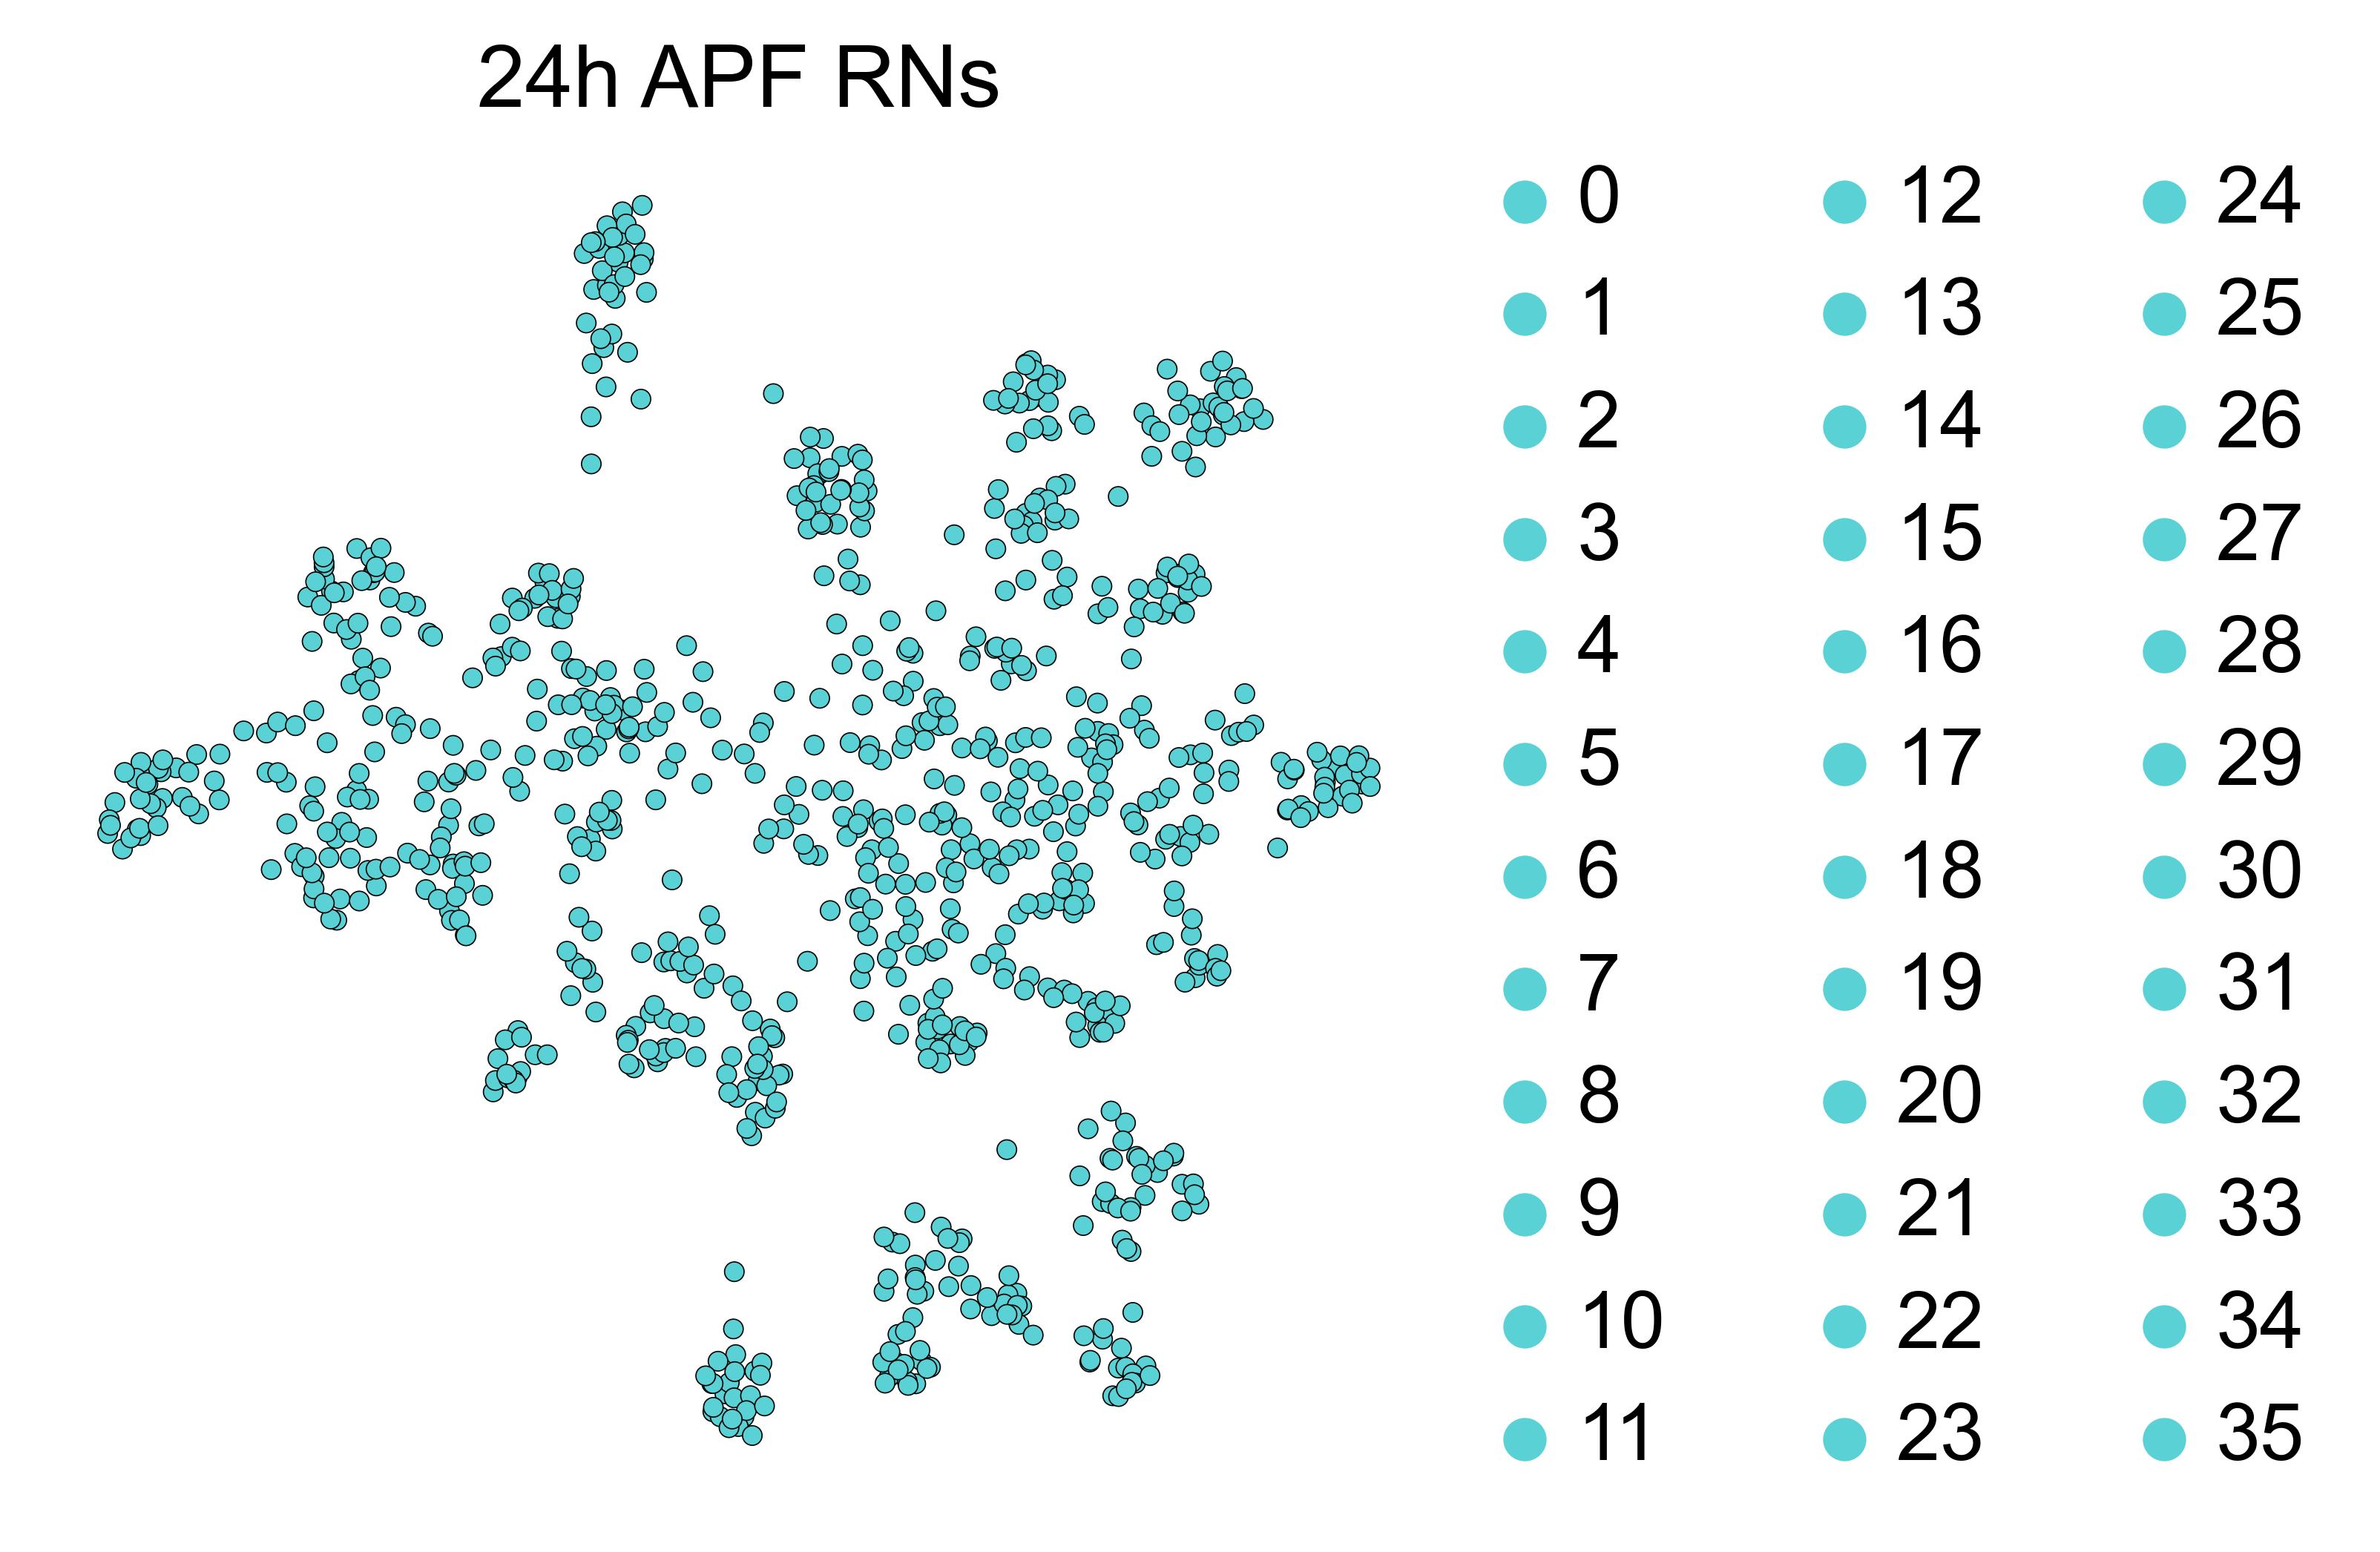

In [6]:
sc.pl.umap(mars_24h, color= 'MARS', size=40, frameon=False, title= '24h APF RNs',
           edgecolor='k', linewidths=0.2) 

In [8]:
mars_24h.obs.all_types.cat.reorder_categories(['DA1', 'DA4l', 'DC3', 'DL3', 'DL4', 'DL5', 'DM1', 'DM2', 'DM3', 'DM4',
       'DP1l',  'V', 'VA1d', 'VA1v', 'VA2', 'VC3', 'VL1', 'VL2a', 'VM3',
       'VM4', 'VM5d/v', 'NaN',], inplace=True)

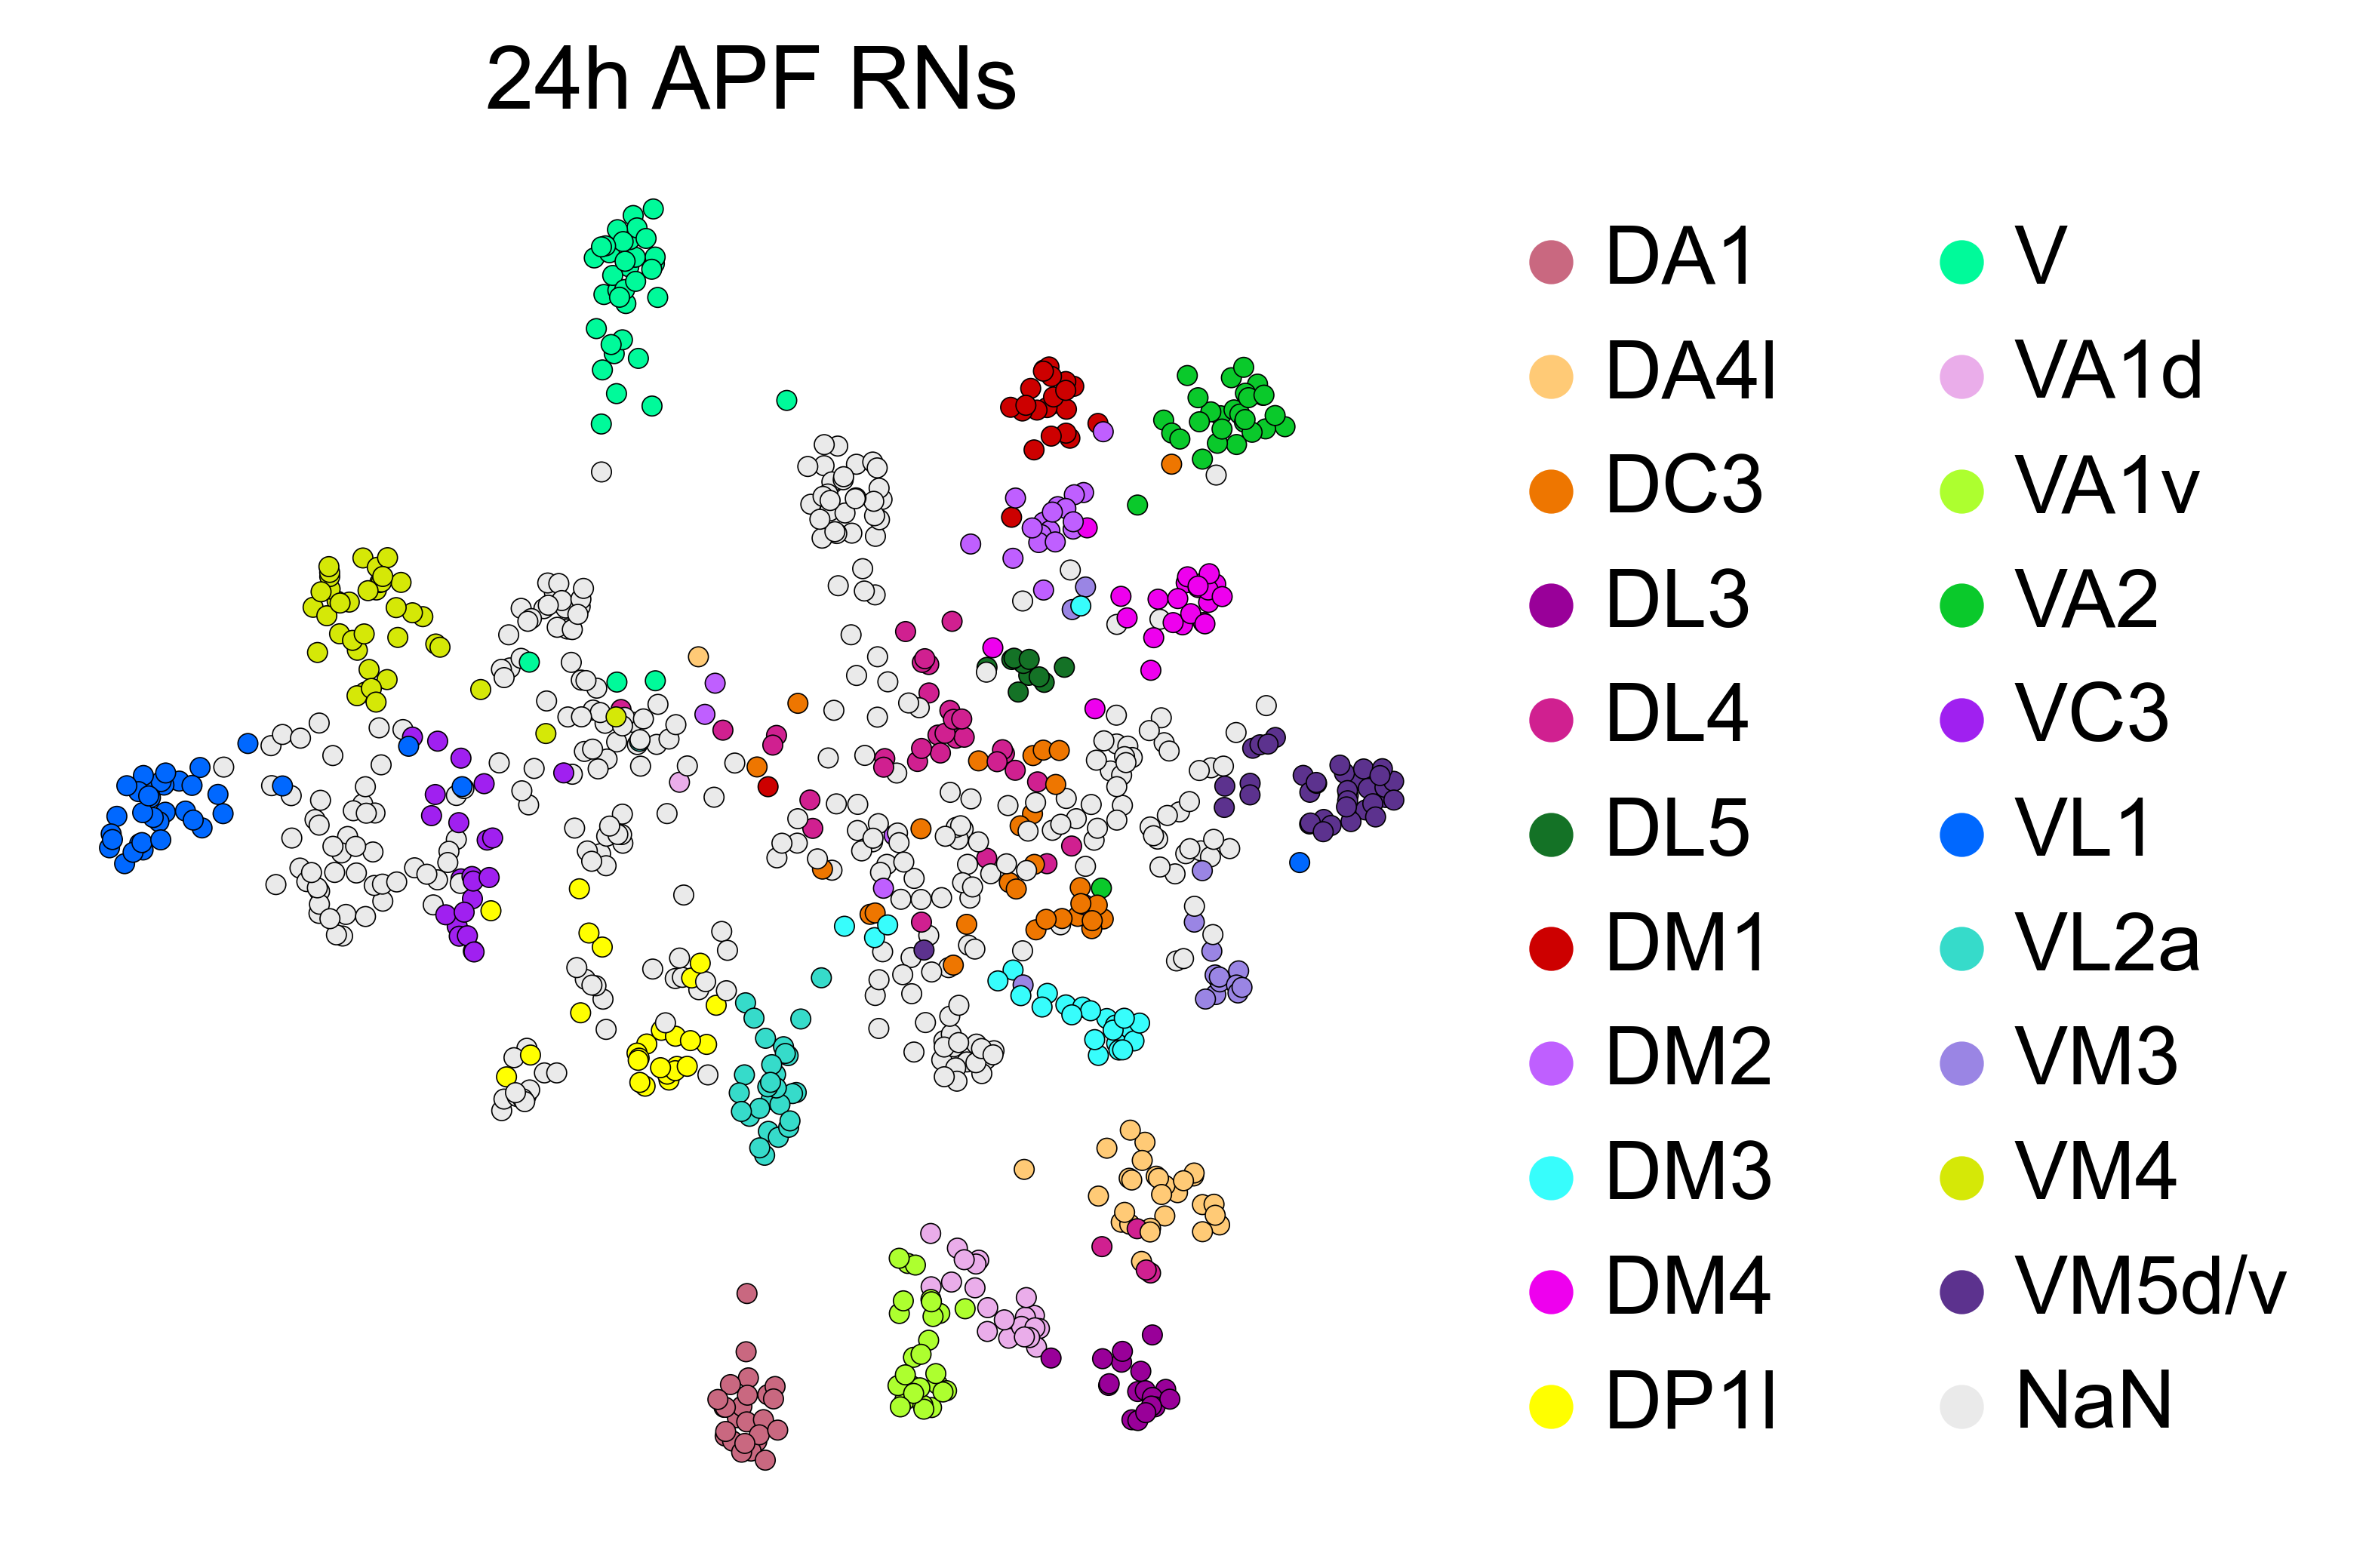

In [11]:
sc.pl.umap(mars_24h, color= 'all_types', size=40, frameon=False, title= '24h APF RNs',
           edgecolor='k', linewidths=0.2) 

In [10]:
#color mars 24h clusters that are annotated
mars_24h.uns['all_types_colors'][0]='#C96880'
mars_24h.uns['all_types_colors'][1]='#FFCA76'
mars_24h.uns['all_types_colors'][2]='#EE7600'
mars_24h.uns['all_types_colors'][3]='#990099'
mars_24h.uns['all_types_colors'][4]='#D02090'
mars_24h.uns['all_types_colors'][5]='#147226'
mars_24h.uns['all_types_colors'][6]='#CD0000'
mars_24h.uns['all_types_colors'][7]='#BF5FFF'
mars_24h.uns['all_types_colors'][8]='#37FDFC'
mars_24h.uns['all_types_colors'][9]='#EE00EE'
mars_24h.uns['all_types_colors'][10]='#FFFF00'
mars_24h.uns['all_types_colors'][11]='#00FA9A'
mars_24h.uns['all_types_colors'][12]='#EAADEA'
mars_24h.uns['all_types_colors'][13]='#ADFF2F'
mars_24h.uns['all_types_colors'][14]='#0AC92B'
mars_24h.uns['all_types_colors'][15]='#A020F0'
mars_24h.uns['all_types_colors'][16]='#0068FF'
mars_24h.uns['all_types_colors'][17]='#36DBCA'
mars_24h.uns['all_types_colors'][18]='#9A85E4'
mars_24h.uns['all_types_colors'][19]='#d5e807'
mars_24h.uns['all_types_colors'][20]='#5C328E'
mars_24h.uns['all_types_colors'][21]='#EAEAEA'


In [12]:
marker_genes_dict = { 'DA1': ['fru', 'hth', 'disco-r'], 'DA4l': ['mid', 'slp2', 'Sp1', 'dati'],'DL3': ['disco-r', 'slp2','SKIP'],'DL4': ['Or85f', 'slp2'],  'DM1': ['Or42b'], 
                      'DM3': ['Or47a', 'slp2', 'Sp1', 'Fs'], 'DP1l': ['Tektin-C','bi', 'hth'],
                       'V': ['Gr21a', 'fkh', 'unpg'],'VA1d': ['Sp1', 'slp2', 'B-H2'],
                     'VA1v': ['Or47b', 'fru', 'disco-r',], 'VA2': ['unpg', 'dac'], 'VC3' : ['Tektin-C', 'bi' ,'Rh50'],
                     'VL1' : ['Ir75d'], 'VL2a': ['fru', 'hth', 'bi', 'Mip'],'VM4': ['Mip'], 'VM5d/v': ['unpg', 'Sp1', 'bi', 'Dll', ]}


In [13]:
manually_matched = list(['DA1', 'DA4l', 'DL3', 'DL4', 'DM1', 'DM3', 'DP1l', 'V', 'VA1d', 'VA1v', 'VC3', 'VL1', 'VL2a', 'VM4', 
                   'VM5d/v'])

In [14]:
ORN_24h = ORN_all[(ORN_all.obs.stage != '42h') & (ORN_all.obs.stage != 'adult') & (ORN_all.obs.all_types.isin(manually_matched))]

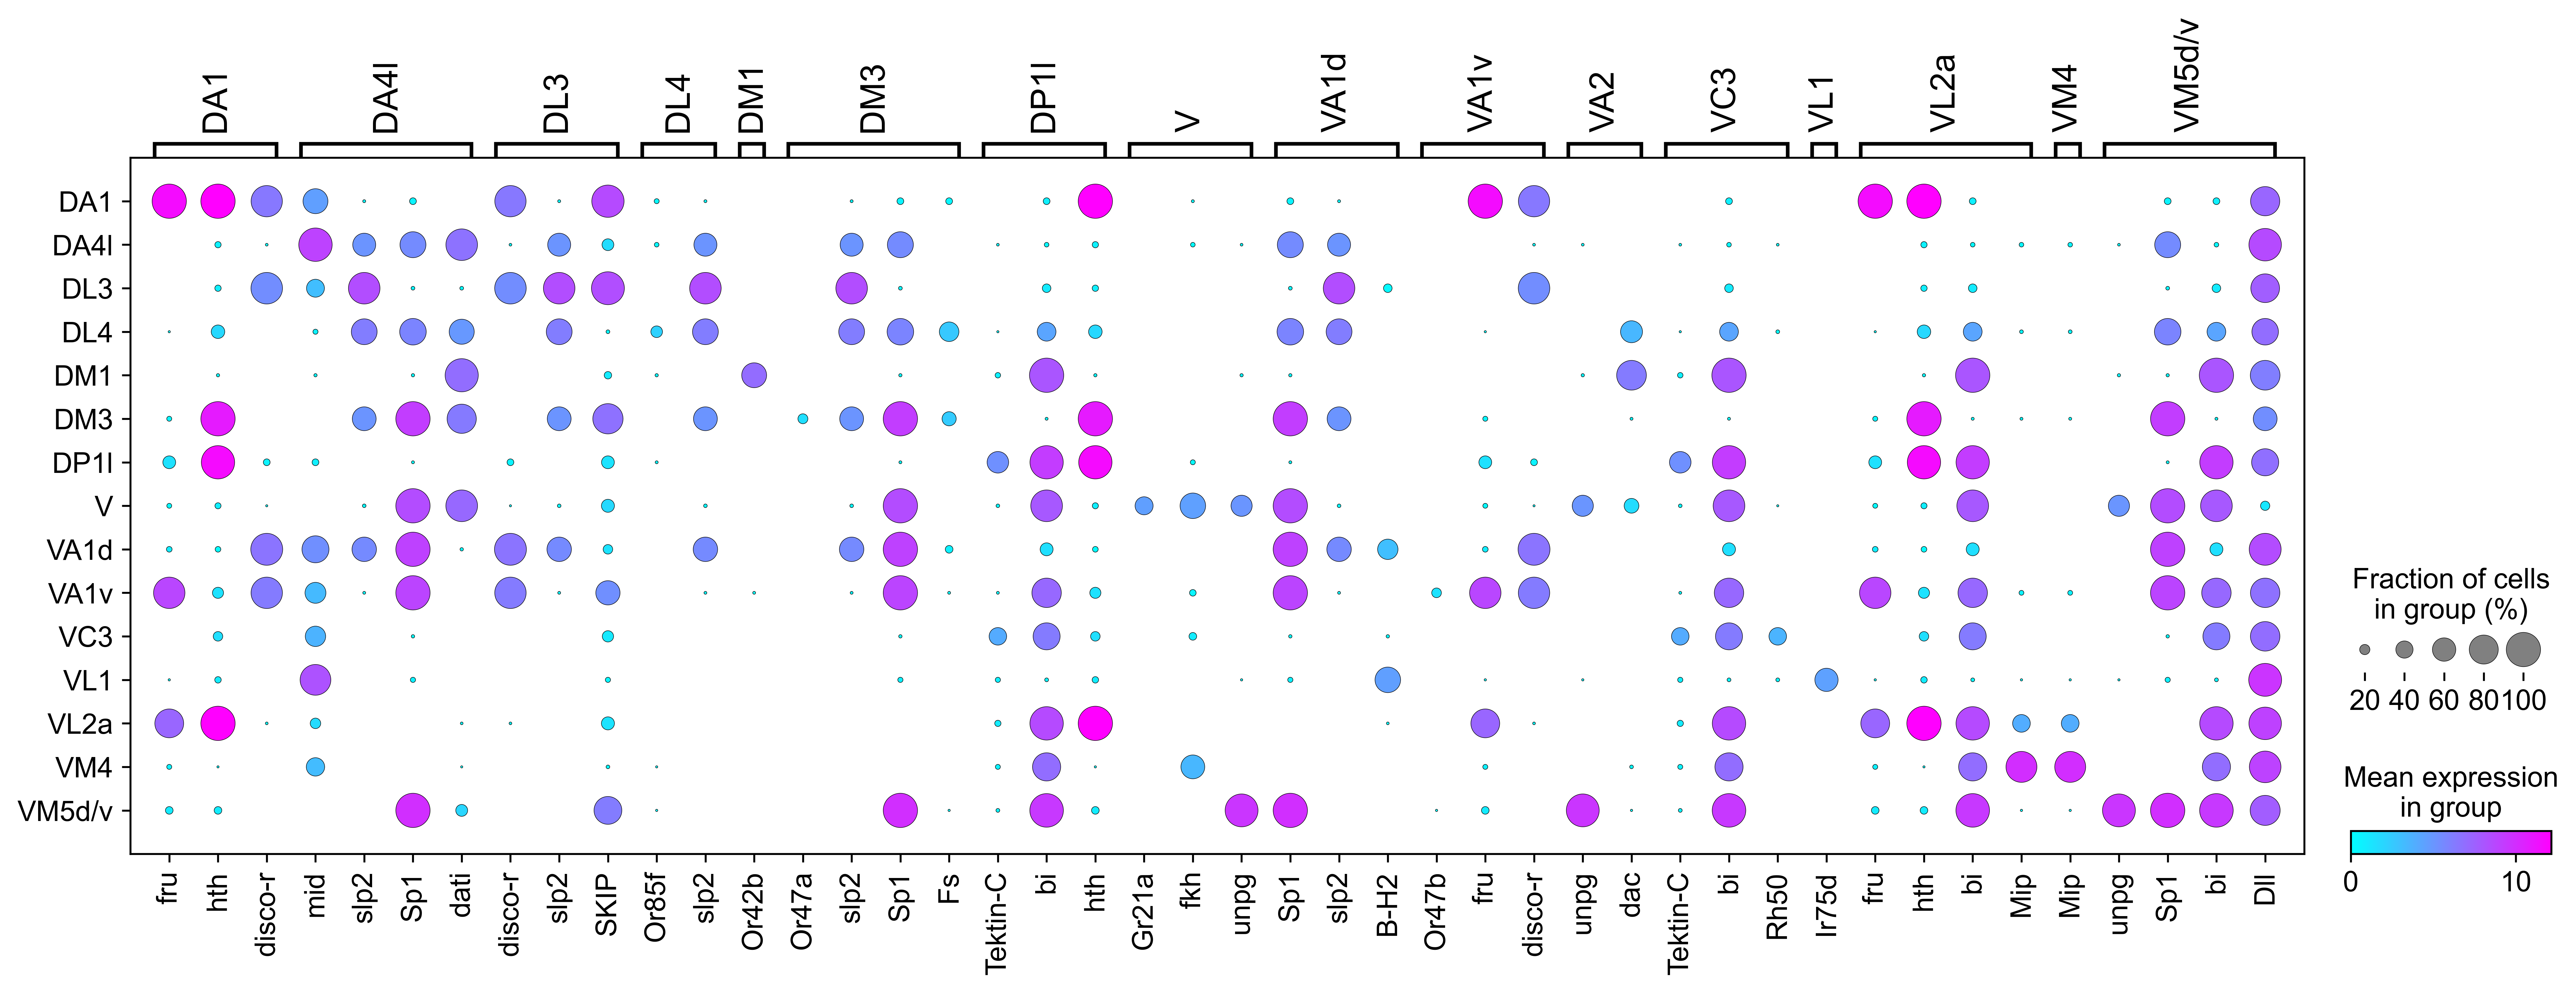

In [15]:
sc.pl.dotplot(ORN_24h, marker_genes_dict, groupby='all_types', color_map='cool') 